<a href="https://colab.research.google.com/github/bbrauser/WKYYRealEstate/blob/main/Real_Estate_Descriptive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Data

The data used in this project is information on sold residential properties found on the Western Kentucky Multiple Listing Service (MLS). The data was gathered on 8/24/23. It contains the following columns:


• Price (str) - The price the property was sold for

• Days on Market (str) - The number of days the property spent on the market before it was sold

• County (str) - The Kentucky county the property is located in

• City (str) - The Kentucky city the property is located in

• # Full Baths (int) - The number of full baths on the property

• # Half Baths (int) - The number of half baths on the property

• # of Bedrooms (int) - The number of bedrooms on the property

• Approx Number of Acres (float) - The approximate number of acres the property is on

• Approx Total Sq Ft (float) - The approximate total square feet of the building on the property

• Approximate Year Built (float) - The approximate year the building was constructed

• Basement (boolean) - Whether the property has a basement or not

• Garage Capacity (int) - The number of vehicles the garage can hold (if applicable)

• Carport Capacity (int) - The number of vehicles the carport can hold (if applicable)

# Importing the Necessary Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import skew, kurtosis
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display, clear_output
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm

# Importing the Data

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/bbrauser/WKYYRealEstate/main/Real_Estate_Data.csv')
df

,Price,Days On Market,County,City,# Full Baths,# Half Baths,# of Bedrooms,Approx Number of Acres,Approx Total Sq Ft,Approximate Year Built,Basement,Garage Capacity,Carport Capacity
0,$550,0,Christian,Hopkinsville,0,0,0,0.52,1156.0,NaN,No,0,0
1,$550,0,Christian,Hopkinsville,0,0,3,0.63,1224.0,NaN,No,2,0
2,"$1,000",0,McCracken,Paducah,1,0,2,0.31,612.0,1953.0,No,0,0
3,"$1,200",305,McCracken,Paducah,1,0,2,0.18,1260.0,1897.0,No,0,0
4,"$1,650",0,Christian,Hopkinsville,1,0,2,0.08,1199.0,NaN,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"$160,000",141,Graves,Mayfield,2,0,3,0.56,1761.0,2007.0,No,2,0
9996,"$160,000",47,Graves,Mayfield,2,0,4,1.00,2588.0,1975.0,No,1,0
9997,"$160,000",54,McCracken,Paducah,1,1,3,0.22,1721.0,1962.0,No,1,0
9998,"$160,000",183,Trigg,Cadiz,2,0,3,0.50,2692.0,1974.0,Yes,2,0


# Cleaning the Data

In [46]:
# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Removing NaN values
df.dropna(inplace=True)

# Filter rows where 'Days_On_Market' is not convertible to an integer
mask = df['Days_On_Market'] != '[Listing Date Or Off Market Date Is Null]'
df = df[mask].copy()

# Now, you can safely convert to integers without warnings
df['Price'] = df['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)
df['Days_On_Market'] = df['Days_On_Market'].astype(int)
df['Approximate_Year_Built'] = df['Approximate_Year_Built'].astype(int)
df['Approx_Total_Sq_Ft'] = df['Approx_Total_Sq_Ft'].astype(int)

# Setting the minimum amount
df = df[df['Price'] >= 30000].reset_index(drop=True)

# Removing results that are not in KY
df = df[~df['County'].isin(['Tennessee', 'Other'])]

df

,Price,Days_On_Market,County,City,#_Full_Baths,#_Half_Baths,#_of_Bedrooms,Approx_Number_of_Acres,Approx_Total_Sq_Ft,Approximate_Year_Built,Basement,Garage_Capacity,Carport_Capacity
0,30000,0,McCracken,Boaz,1,0,3,1.10,1100,1975,Yes,2,0
1,30000,36,McCracken,Paducah,3,0,3,0.86,3148,1965,Yes,2,0
2,30000,64,McCracken,Paducah,1,0,3,0.12,1230,1951,No,0,0
3,30000,65,McCracken,Paducah,1,0,1,0.63,624,1949,Yes,1,0
4,30000,41,McCracken,Paducah,1,0,2,0.18,1131,1922,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066,160000,141,Graves,Mayfield,2,0,3,0.56,1761,2007,No,2,0
6067,160000,47,Graves,Mayfield,2,0,4,1.00,2588,1975,No,1,0
6068,160000,54,McCracken,Paducah,1,1,3,0.22,1721,1962,No,1,0
6069,160000,183,Trigg,Cadiz,2,0,3,0.50,2692,1974,Yes,2,0


# General Descriptive Statistics

In [47]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate statistics for each numeric column
desc_stats = round(df[numeric_columns].describe().loc[['mean', '50%', 'std', 'min', 'max']].transpose(), 2)

# Rename '50%' to 'median' for clarity
desc_stats.rename(columns={'50%': 'median'}, inplace=True)

desc_stats

,mean,median,std,min,max
Price,106601.90,110500.00,34418.48,30000.0,160000.0
Days_On_Market,112.98,73.00,130.02,0.0,3010.0
#_Full_Baths,1.58,2.00,0.57,0.0,6.0
#_Half_Baths,0.17,0.00,0.38,0.0,3.0
#_of_Bedrooms,2.89,3.00,0.67,0.0,8.0
Approx_Number_of_Acres,0.97,0.46,2.48,0.0,88.0
Approx_Total_Sq_Ft,1504.11,1427.00,489.39,0.0,4928.0
Approximate_Year_Built,1966.17,1969.00,331.71,0.0,19669.0
Garage_Capacity,1.12,1.00,6.75,0.0,520.0
Carport_Capacity,0.41,0.00,0.70,0.0,6.0


# Location Based Insights

## County

In [48]:
# Group by 'County' and compute descriptive statistics
county = df.groupby('County')
county_agg = county.agg({
    'Price': ['mean', 'median', 'min', 'max', 'std'],
    'Days_On_Market': ['mean', 'median', 'min', 'max', 'std'],
    '#_Full_Baths': ['mean', 'median', 'min', 'max', 'std'],
    '#_Half_Baths': ['mean', 'median', 'min', 'max', 'std'],
    '#_of_Bedrooms': ['mean', 'median', 'min', 'max', 'std'],
    'Approx_Number_of_Acres': ['mean', 'median', 'min', 'max', 'std'],
    'Approx_Total_Sq_Ft': ['mean', 'median', 'min', 'max', 'std'],
    'Approximate_Year_Built': ['mean', 'median', 'min', 'max', 'std'],
    'Garage_Capacity': ['mean', 'median', 'min', 'max', 'std'],
    'Carport_Capacity': ['mean', 'median', 'min', 'max', 'std']
}).round(2)

# Format Price statistics with dollar sign
price_columns = [('Price', 'mean'), ('Price', 'median'), ('Price', 'min'), ('Price', 'max')]
for col in price_columns:
    county_agg[col] = county_agg[col].apply(lambda x: "${:,.2f}".format(x))

county_agg

Price                                                  \
                   mean       median         min          max       std   
County                                                                    
Ballard      $96,362.12   $92,750.00  $37,500.00  $159,900.00  33517.02   
Caldwell    $100,378.99   $95,500.00  $32,000.00  $160,000.00  33720.02   
Calloway    $119,056.15  $125,250.00  $30,000.00  $160,000.00  30357.49   
Carlisle     $91,190.00   $83,475.00  $32,500.00  $156,000.00  33631.12   
Christian   $110,470.85  $115,000.00  $30,000.00  $160,000.00  35150.37   
Crittenden  $102,180.26  $103,000.00  $36,000.00  $159,000.00  30759.13   
Fulton       $93,483.71   $93,250.00  $33,000.00  $159,650.00  34411.56   
Graves      $103,973.09  $104,400.00  $30,000.00  $160,000.00  33370.14   
Hickman      $85,222.22   $79,750.00  $32,000.00  $160,000.00  34797.01   
Hopkins      $85,680.00   $73,000.00  $30,000.00  $159,900.00  44726.04   
Livingston  $105,068.53  $104,950.00  $30,000.00  $160,000.00  32812.38   
Lyon        $113,061.73  $121,500.00  $37,000.00  $160,000.00  30938.26   
Marshall    $109,678.51  $114,900.00  $30,000.00  $160,000.00  32429.62   
McCracken   $103,934.39  $109,900.00  $30,000.00  $160,000.00  35906.23   
Todd         $78,500.00   $78,500.00  $78,500.00   $78,500.00       NaN   
Trigg       $111,336.58  $119,000.00  $30,000.00  $160,000.00  33109.72   
Union        $97,000.00   $97,000.00  $97,000.00   $97,000.00       NaN   

           Days_On_Market                            ... Garage_Capacity  \
                     mean median  min   max     std  ...            mean   
County                                               ...                   
Ballard            154.55   92.5    0  3010  282.51  ...            1.12   
Caldwell           124.65   76.0    0   888  136.65  ...            1.01   
Calloway           111.37   76.0    0  1289  112.52  ...            0.98   
Carlisle           145.44   87.0    0   972  158.63  ...            1.10   
Christian           91.69   60.5    0   456   98.04  ...            8.11   
Crittenden         117.66   65.0    0  1219  198.28  ...            1.53   
Fulton             104.71   63.5    0   333   98.99  ...            0.64   
Graves             111.22   74.0    0  1204  117.72  ...            1.06   
Hickman            118.44   79.0    0   453  109.48  ...            0.83   
Hopkins            138.00   69.0    0   903  185.87  ...            0.84   
Livingston         124.55   78.0    0   926  135.35  ...            1.36   
Lyon               116.71   87.0    0   889  114.73  ...            0.97   
Marshall           119.56   79.0    0  2729  140.08  ...            1.09   
McCracken          100.77   66.0    0  1438  112.45  ...            0.98   
Todd               136.00  136.0  136   136     NaN  ...            1.00   
Trigg              136.78   87.0    0  1082  142.54  ...            1.10   
Union               47.00   47.0   47    47     NaN  ...            0.00   

                                  Carport_Capacity                       
           median min  max    std             mean median min max   std  
County                                                                   
Ballard       1.0   0    4   1.11             0.53    0.0   0   3  0.76  
Caldwell      1.0   0    4   1.14             0.45    0.0   0   3  0.70  
Calloway      1.0   0    6   0.99             0.40    0.0   0   6  0.68  
Carlisle      1.0   0    4   1.07             0.60    0.0   0   3  0.76  
Christian     0.5   0  520  61.18             0.24    0.0   0   2  0.57  
Crittenden    1.5   0    4   1.16             0.39    0.0   0   2  0.68  
Fulton        0.0   0    2   0.87             0.82    0.5   0   2  0.90  
Graves        1.0   0    5   1.00             0.45    0.0   0   3  0.69  
Hickman       0.0   0    3   1.02             0.65    0.5   0   2  0.73  
Hopkins       0.0   0    4   1.07             0.48    0.0   0   2  0.71  
Livingston    2.0   0    4   1.02 

## City

In [49]:
# Group by 'County' and compute descriptive statistics
city = df.groupby('City')
city_agg = city.agg({
    'Price': ['mean', 'median', 'min', 'max', 'std'],
    'Days_On_Market': ['mean', 'median', 'min', 'max', 'std'],
    '#_Full_Baths': ['mean', 'median', 'min', 'max', 'std'],
    '#_Half_Baths': ['mean', 'median', 'min', 'max', 'std'],
    '#_of_Bedrooms': ['mean', 'median', 'min', 'max', 'std'],
    'Approx_Number_of_Acres': ['mean', 'median', 'min', 'max', 'std'],
    'Approx_Total_Sq_Ft': ['mean', 'median', 'min', 'max', 'std'],
    'Approximate_Year_Built': ['mean', 'median', 'min', 'max', 'std'],
    'Garage_Capacity': ['mean', 'median', 'min', 'max', 'std'],
    'Carport_Capacity': ['mean', 'median', 'min', 'max', 'std']
}).round(2)

# Format Price statistics with dollar sign
price_columns = [('Price', 'mean'), ('Price', 'median'), ('Price', 'min'), ('Price', 'max')]
for col in price_columns:
    city_agg[col] = city_agg[col].apply(lambda x: "${:,.2f}".format(x))

city_agg

Price                                                   \
                     mean       median          min          max       std   
City                                                                         
Almo          $131,564.58  $137,000.00   $40,000.00  $160,000.00  24583.47   
Arlington      $77,560.00   $76,000.00   $32,500.00  $156,000.00  30183.03   
Bardwell       $85,726.98   $82,000.00   $33,000.00  $150,000.00  29649.41   
Barlow         $73,572.73   $68,000.00   $38,000.00  $125,000.00  26888.03   
Benton        $109,082.55  $115,000.00   $31,000.00  $160,000.00  32469.25   
...                   ...          ...          ...          ...       ...   
Trigg County  $120,000.00  $120,000.00  $120,000.00  $120,000.00       NaN   
Water Valley   $75,661.54   $65,000.00   $35,000.00  $142,000.00  30174.18   
West Paducah  $115,975.76  $118,725.00   $40,000.00  $160,000.00  31731.31   
Wickliffe      $88,898.31   $84,000.00   $38,000.00  $157,500.00  31548.45   
Wingo          $95,156.67   $89,000.00   $30,000.00  $155,000.00  36900.57   

             Days_On_Market                            ... Garage_Capacity  \
                       mean median  min   max     std  ...            mean   
City                                                   ...                   
Almo                 113.12   82.0    0   356   87.16  ...            1.56   
Arlington            148.00   76.0    0   420  129.89  ...            0.55   
Bardwell             150.19   99.0    0   972  180.45  ...            1.07   
Barlow               102.09   67.0    0   341  104.94  ...            0.55   
Benton               117.37   79.0    0   882  113.43  ...            1.07   
...                     ...    ...  ...   ...     ...  ...             ...   
Trigg County         301.00  301.0  301   301     NaN  ...            3.00   
Water Valley         194.77  123.0   35   539  178.55  ...            0.69   
West Paducah         100.42   63.0    0   735  119.49  ...            1.42   
Wickliffe            200.80  102.0    0  3010  400.85  ...            0.83   
Wingo                101.73   63.5    0   356   89.07  ...            0.97   

                                  Carport_Capacity                       
             median min max   std             mean median min max   std  
City                                                                     
Almo            2.0   0   4  0.87             0.21    0.0   0   2  0.50  
Arlington       0.0   0   2  0.76             0.90    1.0   0   2  0.72  
Bardwell        1.0   0   4  1.03             0.58    0.0   0   3  0.79  
Barlow          0.0   0   2  0.93             0.45    0.0   0   1  0.52  
Benton          1.0   0   6  1.10             0.60    0.0   0   4  0.79  
...             ...  ..  ..   ...              ...    ...  ..  ..   ...  
Trigg County    3.0   3   3   NaN             1.00    1.0   1   1   NaN  
Water Valley    0.0   0   2  0.85             0.15    0.0   0   1  0.38  
West Paducah    1.0   0   4  0.98             0.27    0.0   0   2  0.57  
Wickliffe       0.0   0   4  1.05             0.68    0.0   0   3  0.88  
Wingo           1.0   0   4  1.04             0.53    0.0   0   2  0.72  

[66 rows x 50 columns]

# Property Features

## Overall Distribution



For #_Full_Baths:
Skewness: 0.51
Kurtosis: 0.74


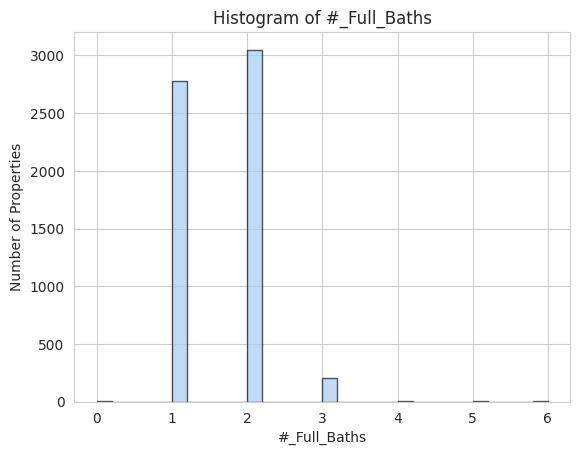

For #_Half_Baths:
Skewness: 2.09
Kurtosis: 3.6


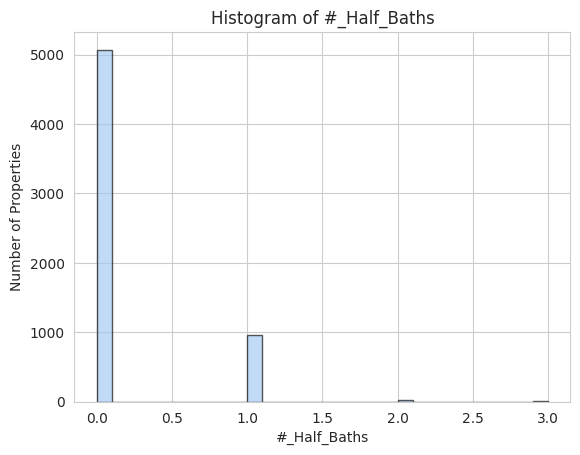

For #_of_Bedrooms:
Skewness: 0.12
Kurtosis: 2.46


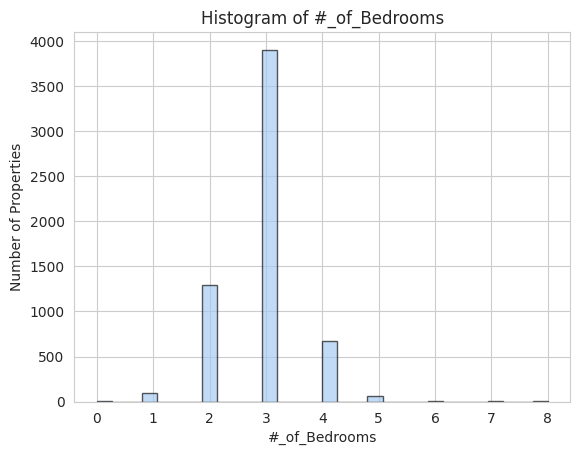

For Approx_Number_of_Acres:
Skewness: 15.48
Kurtosis: 387.32


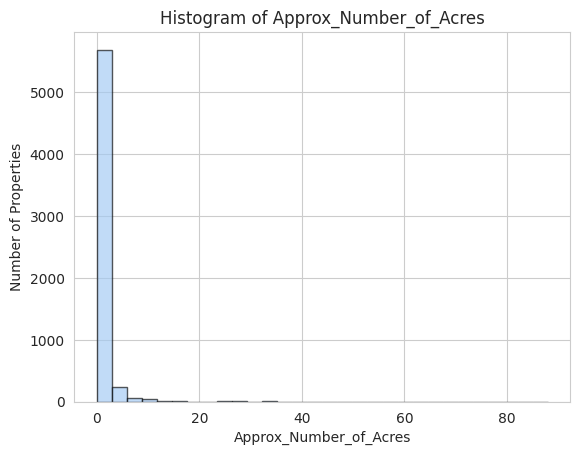

For Approx_Total_Sq_Ft:
Skewness: 1.34
Kurtosis: 3.6


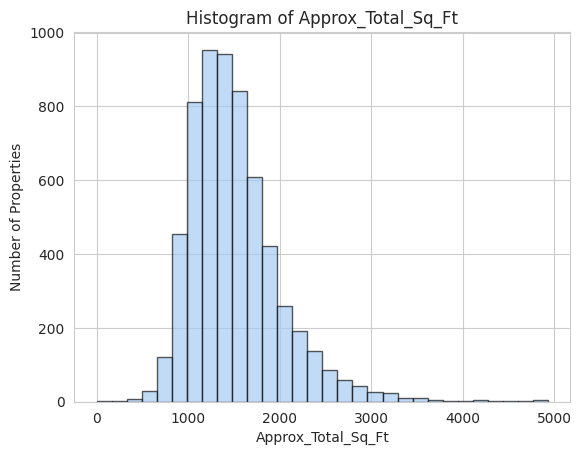

For Approximate_Year_Built:
Skewness: 36.22
Kurtosis: 1742.91


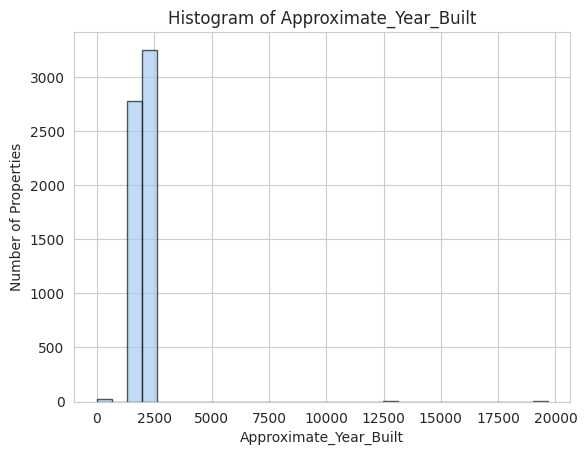

For Garage_Capacity:
Skewness: 75.0
Kurtosis: 5761.13


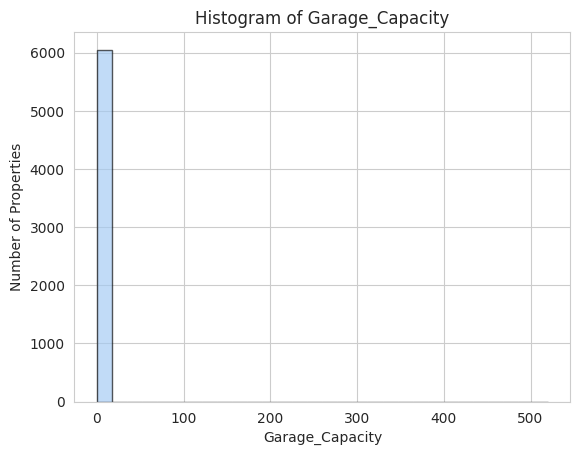

For Carport_Capacity:
Skewness: 1.74
Kurtosis: 3.2


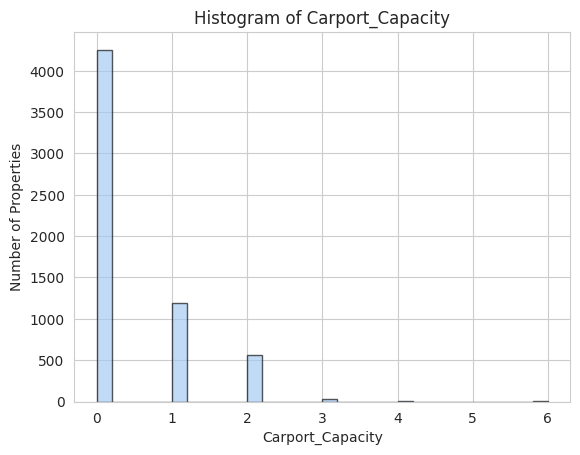

In [50]:
features = ['#_Full_Baths', '#_Half_Baths', '#_of_Bedrooms',
            'Approx_Number_of_Acres', 'Approx_Total_Sq_Ft',
            'Approximate_Year_Built', 'Garage_Capacity', 'Carport_Capacity']

# For each feature, calculate and print skew and kurtosis, then plot a histogram
for feature in features:
    print(f"For {feature}:")
    print(f"Skewness: {round(skew(df[feature]), 2)}")
    print(f"Kurtosis: {round(kurtosis(df[feature]), 2)}")

    # Histogram
    plt.hist(df[feature], bins=30, edgecolor='k', alpha=0.65)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Number of Properties")
    plt.grid(True)
    plt.show()

## By County

In [51]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a function to generate plots based on the selected county
def plot_for_county(county_name):
    county_group = df[df['County'] == county_name]

    for feature in features:
        skewness = round(skew(county_group[feature]), 2)
        kurt = round(kurtosis(county_group[feature]), 2)

        # Histogram using Seaborn
        plt.figure(figsize=(12, 7))
        sns.histplot(county_group[feature], bins=30, edgecolor='k', alpha=0.7)

        plt.title(f"{county_name} - Distribution of {feature}", fontsize=16, fontweight='bold')
        plt.xlabel(feature, fontsize=14)
        plt.ylabel("Number of Properties", fontsize=14)

        # Adding skewness and kurtosis to the plot
        plt.annotate(f"Skewness: {skewness}", xy=(0.7, 0.92), xycoords="axes fraction", fontsize=12, fontweight='bold', color="blue")
        plt.annotate(f"Kurtosis: {kurt}", xy=(0.7, 0.86), xycoords="axes fraction", fontsize=12, fontweight='bold', color="red")

        plt.tight_layout()
        plt.show()

# Dropdown for city selection
county_dropdown = widgets.Dropdown(
    options=sorted(df['City'].unique()),
    description='City:',
    disabled=False,
)

# Button to generate plots for the selected city
plot_button = widgets.Button(description="Plot")

# Event for the button to generate plots
def on_plot_button_click(b):
    clear_output(wait=True)
    display(county_dropdown, plot_button)
    plot_for_county(county_dropdown.value)

plot_button.on_click(on_plot_button_click)

# Display the dropdown and button
display(county_dropdown, plot_button)

Dropdown(description='City:', options=('Almo', 'Arlington', 'Bardwell', 'Barlow', 'Benton', 'Boaz', 'Burna', '…

Button(description='Plot', style=ButtonStyle())

## By City

In [52]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a function to generate plots based on the selected city
def plot_for_city(city_name):
    city_group = df[df['County'] == city_name]

    for feature in features:
        skewness = round(skew(city_group[feature]), 2)
        kurt = round(kurtosis(city_group[feature]), 2)

        # Histogram using Seaborn
        plt.figure(figsize=(12, 7))
        sns.histplot(city_group[feature], bins=30, edgecolor='k', alpha=0.7)

        plt.title(f"{city_name} - Distribution of {feature}", fontsize=16, fontweight='bold')
        plt.xlabel(feature, fontsize=14)
        plt.ylabel("Number of Properties", fontsize=14)

        # Adding skewness and kurtosis to the plot
        plt.annotate(f"Skewness: {skewness}", xy=(0.7, 0.92), xycoords="axes fraction", fontsize=12, fontweight='bold', color="blue")
        plt.annotate(f"Kurtosis: {kurt}", xy=(0.7, 0.86), xycoords="axes fraction", fontsize=12, fontweight='bold', color="red")

        plt.tight_layout()
        plt.show()

# Dropdown for city selection
city_dropdown = widgets.Dropdown(
    options=sorted(df['City'].unique()),
    description='City:',
    disabled=False,
)

# Button to generate plots for the selected city
plot_button = widgets.Button(description="Plot")

# Event for the button to generate plots
def on_plot_button_click(b):
    clear_output(wait=True)
    display(city_dropdown, plot_button)
    plot_for_city(city_dropdown.value)

plot_button.on_click(on_plot_button_click)

# Display the dropdown and button
display(city_dropdown, plot_button)

Dropdown(description='City:', options=('Almo', 'Arlington', 'Bardwell', 'Barlow', 'Benton', 'Boaz', 'Burna', '…

Button(description='Plot', style=ButtonStyle())

# Time Based Insights

## How have property prices evolved over the years based on the approximate year the home was built?

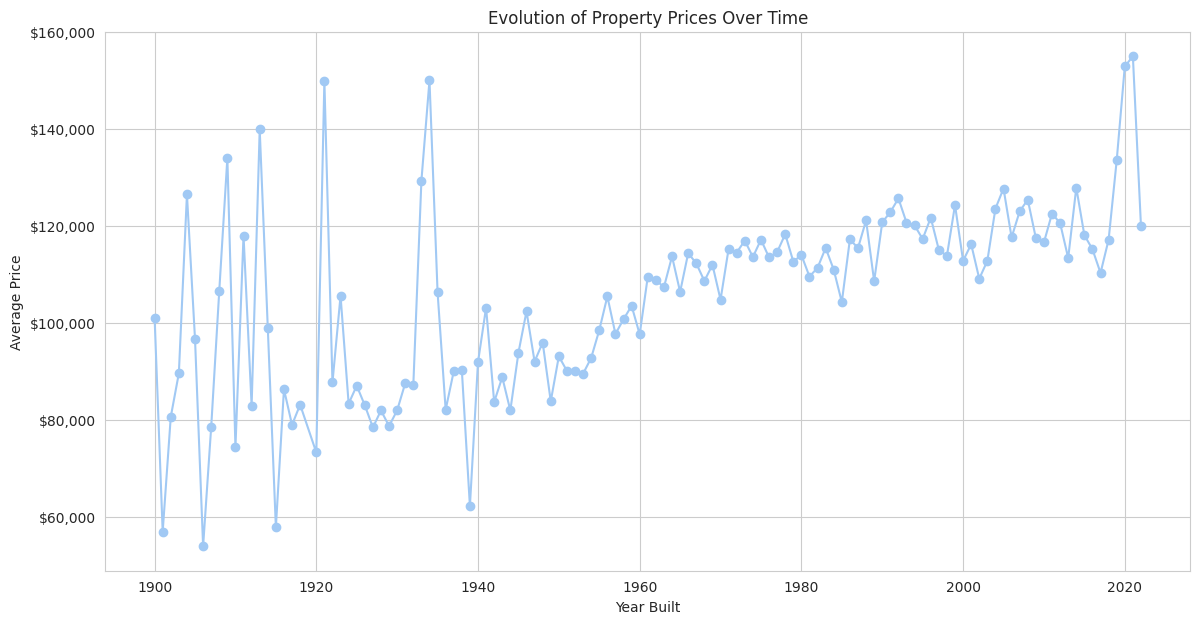

In [53]:
# Grouping the rows by the year it was built
yearly_avg_price = df.groupby('Approximate_Year_Built')['Price'].mean().reset_index()
yearly_avg_price = yearly_avg_price[(yearly_avg_price['Approximate_Year_Built'] >= 1900) & (yearly_avg_price['Approximate_Year_Built'] <= 2023)]

# Define the custom dollar formatter
def dollar_formatter(x, pos):
    return "${:,.0f}".format(x)

# Plotting
plt.figure(figsize=(14,7))
plt.plot(yearly_avg_price['Approximate_Year_Built'], yearly_avg_price['Price'], marker='o')

# Set the title and labels
plt.title('Evolution of Property Prices Over Time')
plt.xlabel('Year Built')
plt.ylabel('Average Price')

# Format the y-axis
formatter = FuncFormatter(dollar_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

## Are older or newer homes on the market for longer periods?

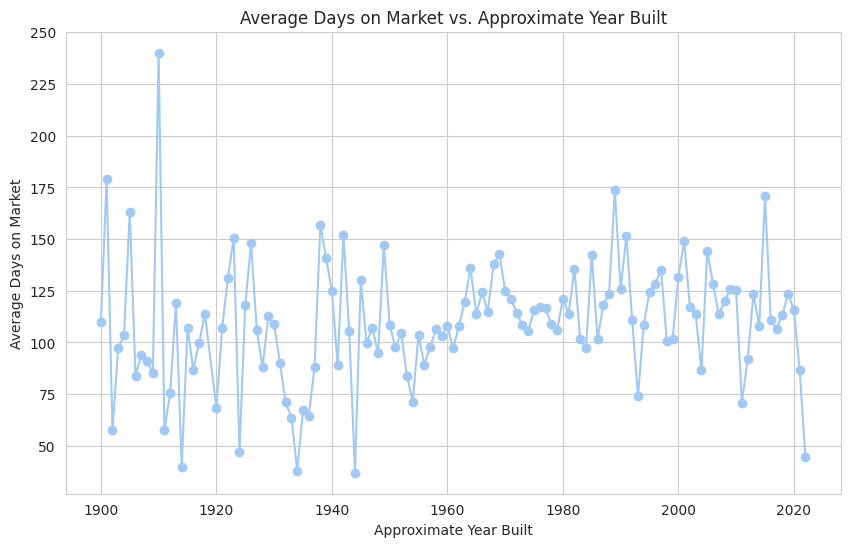

In [54]:
# Group by 'Approximate Year Built' and calculate the average days on market
avg_days = df.groupby('Approximate_Year_Built')['Days_On_Market'].mean().reset_index()
avg_days = avg_days[(avg_days['Approximate_Year_Built'] >= 1900) & (avg_days['Approximate_Year_Built'] <= 2023)]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(avg_days['Approximate_Year_Built'], avg_days['Days_On_Market'], marker='o')
plt.title('Average Days on Market vs. Approximate Year Built')
plt.xlabel('Approximate Year Built')
plt.ylabel('Average Days on Market')

plt.grid(True)
plt.show()

# Size Insights

## Is there a correlation between property price and the number of days on the market?

In [82]:
# Compute the Pearson correlation
dom_coefficient, dom_p_value = pearsonr(df['Price'], df['Days_On_Market'])

def interpret_coefficient(coefficient, p_value):
    # Direction
    direction = "negative" if coefficient < 0 else "positive"

    # Strength
    abs_coefficient = abs(coefficient)
    if abs_coefficient == 1:
        strength = "perfect"
    elif 0.8 <= abs_coefficient < 1:
        strength = "very strong"
    elif 0.6 <= abs_coefficient < 0.8:
        strength = "strong"
    elif 0.4 <= abs_coefficient < 0.6:
        strength = "moderate"
    elif 0.2 <= abs_coefficient < 0.4:
        strength = "weak"
    elif 0.0 <= abs_coefficient < 0.2:
        strength = "very weak"
    else:
        strength = "neutral"

    # Significance
    significance = "statistically significant" if p_value < 0.05 else "statistically insignificant"

    print(f"With a Pearson coefficient of {coefficient.round(2)} and a p-value of {p_value.round(2)}, there is a {significance}, {strength}, and {direction} correlation.")

print('Days On Market:')
interpret_coefficient(dom_coefficient, dom_p_value)

Days On Market:
With a Pearson coefficient of -0.06 and a p-value of 0.0, there is a statistically significant, very weak, and negative correlation.


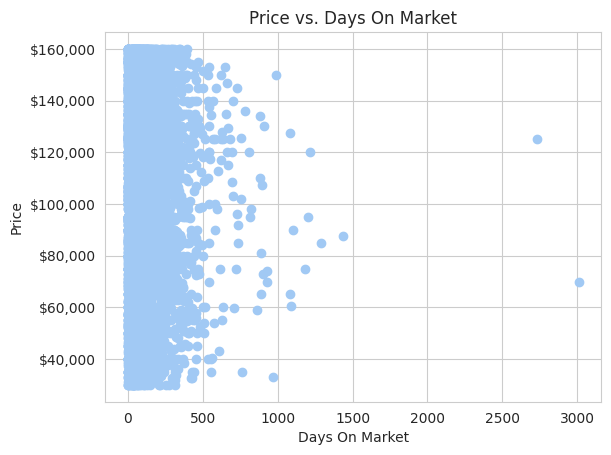

In [81]:
# For Days On Market vs. Price
plt.scatter(df['Days_On_Market'], df['Price'])
plt.title('Price vs. Days On Market')
plt.xlabel('Days On Market')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## Is there a correlation between the size of the property (in sq ft or acres) and its price?

In [76]:
# Compute the Pearson correlation
sq_ft_coefficient, sq_ft_p_value = pearsonr(df['Price'], df['Approx_Total_Sq_Ft'])
acre_coefficient, acre_p_value = pearsonr(df['Price'], df['Approx_Number_of_Acres'])
print('Approximate Total Square Feet:')
interpret_coefficient(sq_ft_coefficient, sq_ft_p_value)
print('Approximate Number of Acres:')
interpret_coefficient(acre_coefficient, acre_p_value)

Approximate Total Square Feet:
With a Pearson coefficient of 0.38 and a p-value of 0.0, there is a statistically significant, weak, and positive correlation.
Approximate Number of Acres:
With a Pearson coefficient of 0.09 and a p-value of 0.0, there is a statistically significant, very weak, and positive correlation.


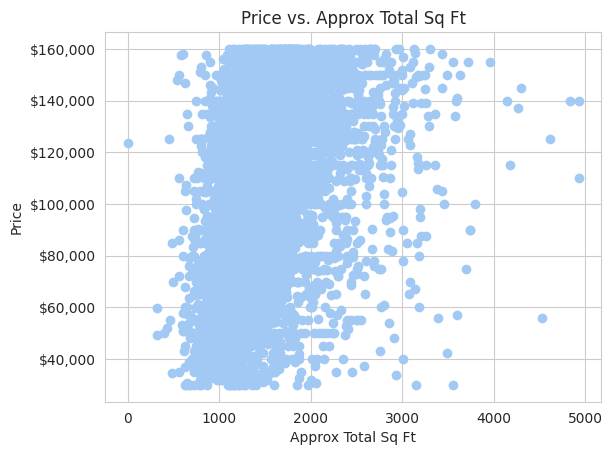

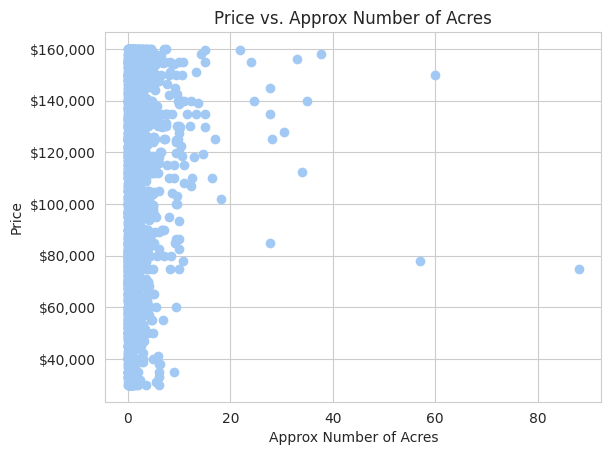

In [79]:
# For Sq Ft vs. Price
plt.scatter(df['Approx_Total_Sq_Ft'], df['Price'])
plt.title('Price vs. Approx Total Sq Ft')
plt.xlabel('Approx Total Sq Ft')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# For Acres vs. Price
plt.scatter(df['Approx_Number_of_Acres'], df['Price'])
plt.title('Price vs. Approx Number of Acres')
plt.xlabel('Approx Number of Acres')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Property Composition

## What's the most common combination of bedrooms and bathrooms in the dataset?

In [90]:
# Group by '# of Bedrooms' and '# Full Baths', then count the occurrences of each combination
combinations = df.groupby(['#_of_Bedrooms', '#_Full_Baths', '#_Half_Baths', 'Garage_Capacity', 'Carport_Capacity', 'Basement']).size().reset_index(name='Counts')

# Sort the combinations by their counts in descending order and get the top combination
most_common_combination = combinations.sort_values('Counts', ascending=False).iloc[0]

# Prepare the basement string based on the boolean value
basement_string = "a basement" if most_common_combination['Basement'] == True else "no basement"

print(f"The most common combination of property features is {most_common_combination['#_of_Bedrooms']} bedrooms, {most_common_combination['#_Full_Baths']} full baths, {most_common_combination['#_Half_Baths']} half baths, {basement_string}, a {most_common_combination['Garage_Capacity']} car garage, and a {most_common_combination['Carport_Capacity']} car carport.")

The most common combination of property features is 3 bedrooms, 2 full baths, 0 half baths, no basement, a 2 car garage, and a 0 car carport.


## Are properties with more bedrooms more likely to have a garage or carport?

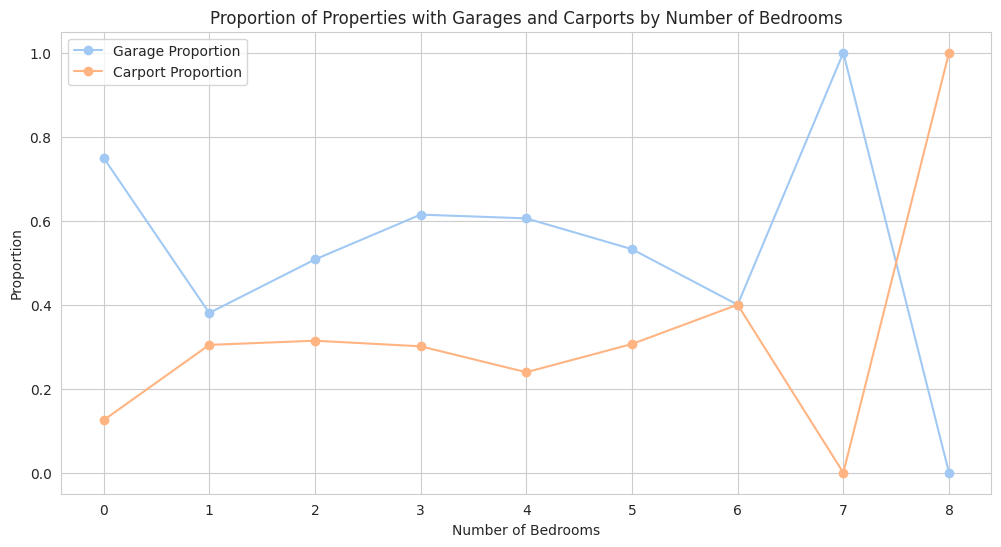

In [93]:
# Convert Garage and Carport capacities to boolean (presence or absence)
df['Has_Garage'] = df['Garage_Capacity'] > 0
df['Has_Carport'] = df['Carport_Capacity'] > 0

# Group by the number of bedrooms and calculate the proportion of properties with garages and carports
garage_proportion = df.groupby('#_of_Bedrooms')['Has_Garage'].mean()
carport_proportion = df.groupby('#_of_Bedrooms')['Has_Carport'].mean()

plt.figure(figsize=(12, 6))

plt.plot(garage_proportion, label='Garage Proportion', marker='o')
plt.plot(carport_proportion, label='Carport Proportion', marker='o')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Proportion')
plt.title('Proportion of Properties with Garages and Carports by Number of Bedrooms')
plt.legend()

plt.show()


# Pricing Bands

## How many properties fall into different price bands (e.g., <$100k, $100k-$200k, etc.)?

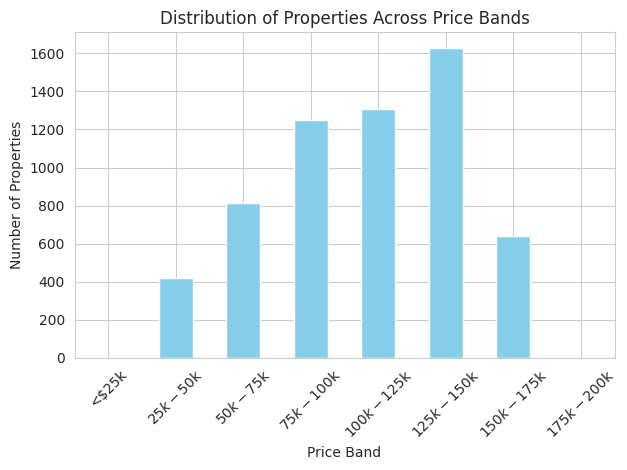

In [98]:
# Define the bins for the price bands
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
labels = ['<$25k', '$25k-$50k', '$50k-$75k', '$75k-$100k', '$100k-$125k', '$125k-$150k',
          '$150k-$175k', '$175k-$200k']

# Create a new column for the price bands
df['Price Band'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

# Count the number of properties in each price band
price_band_counts = df['Price Band'].value_counts().sort_index()

# Plotting
price_band_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Properties Across Price Bands')
plt.xlabel('Price Band')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

# Market Time Insights

## Are larger properties (in terms of sq ft or acres) on the market for longer than smaller properties?

Approximate Number of Acres
With a Pearson coefficient of 0.13 and a p-value of 0.0, there is a statistically significant, very weak, and positive correlation.
Approximate Total Square Feet
With a Pearson coefficient of 0.01 and a p-value of 0.55, there is a statistically insignificant, very weak, and positive correlation.


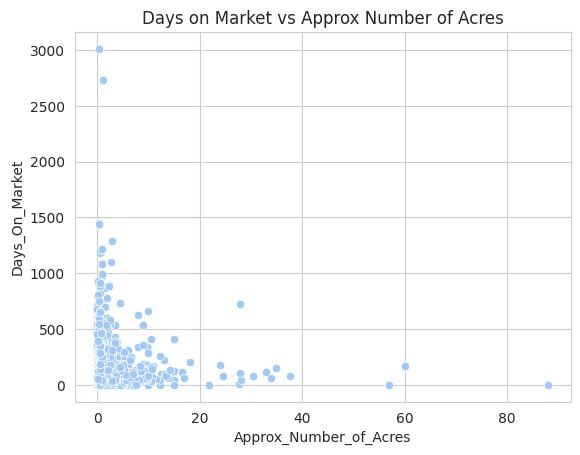

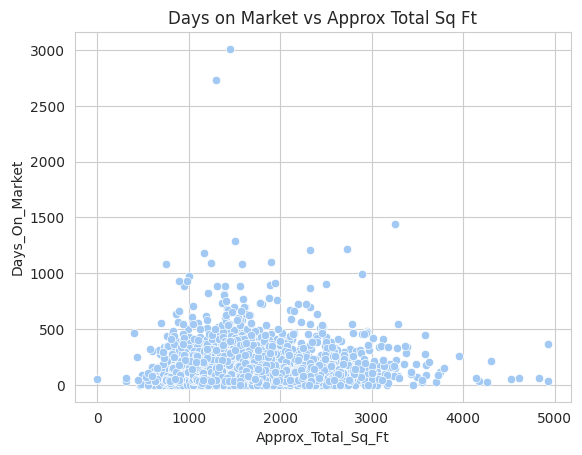

In [103]:
# Assuming df is your dataframe
correlation_acres, p_value_acres = pearsonr(df['Days_On_Market'], df['Approx_Total_Sq_Ft'])
correlation_sqft, p_value_sqft = pearsonr(df['Days_On_Market'], df['Approx_Number_of_Acres'])

print("Approximate Number of Acres")
interpret_coefficient(correlation_acres, p_value_acres)
print("Approximate Total Square Feet")
interpret_coefficient(correlation_sqft, p_value_sqft)

# Scatter plot for Days on Market vs Approx Number of Acres
sns.scatterplot(x=df['Approx_Number_of_Acres'], y=df['Days_On_Market'])
plt.title('Days on Market vs Approx Number of Acres')
plt.show()

# Scatter plot for Days on Market vs Approx Total Sq Ft
sns.scatterplot(x=df['Approx_Total_Sq_Ft'], y=df['Days_On_Market'])
plt.title('Days on Market vs Approx Total Sq Ft')
plt.show()

## How does the number of baths and bedrooms affect the number of days a property stays on the market?

### Visual Analysis

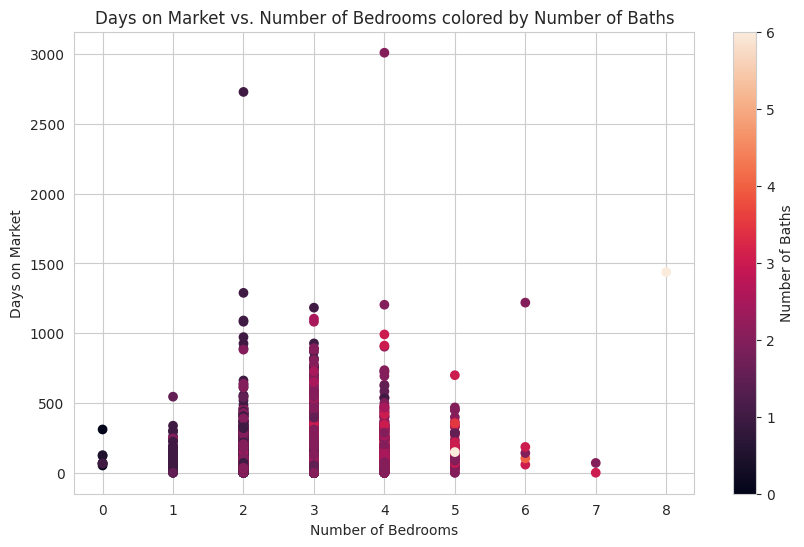

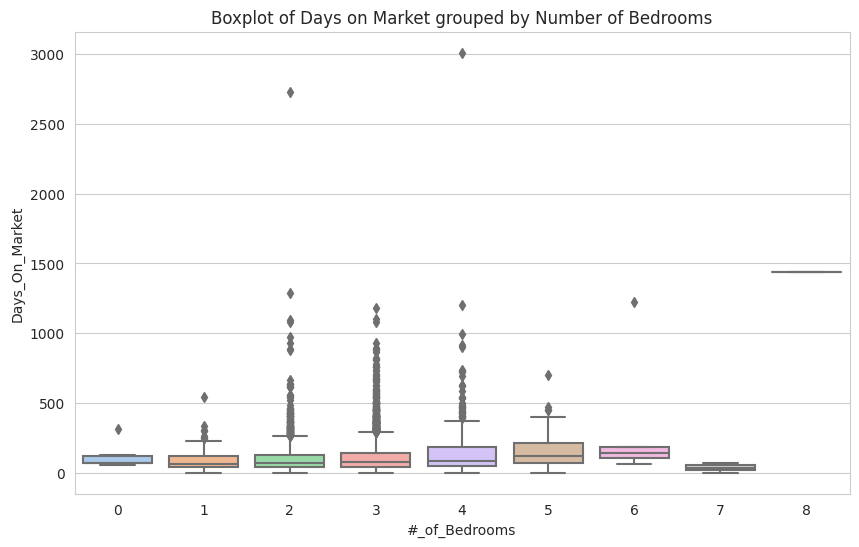

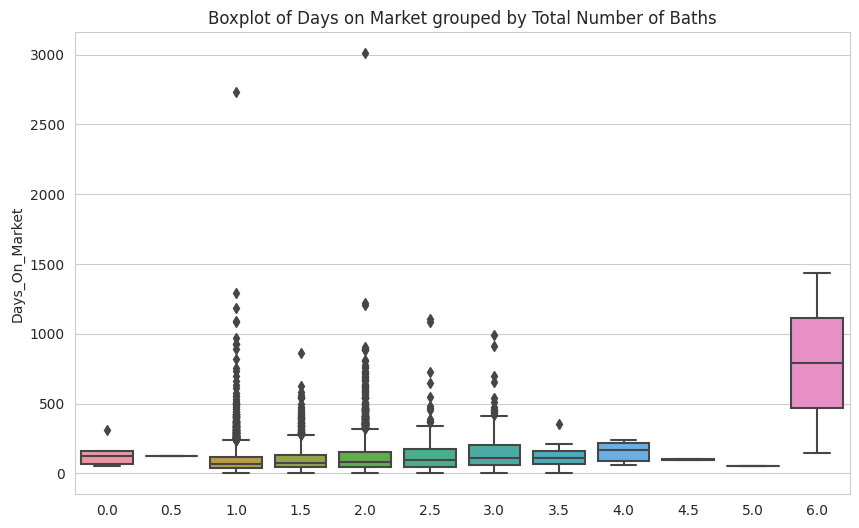

In [105]:
# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df['#_of_Bedrooms'], df['Days_On_Market'], c=df['#_Full_Baths'] + df['#_Half_Baths']*0.5)
plt.colorbar(label='Number of Baths')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Days on Market')
plt.title('Days on Market vs. Number of Bedrooms colored by Number of Baths')
plt.show()

# Boxplot for Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x=df['#_of_Bedrooms'], y=df['Days_On_Market'])
plt.title('Boxplot of Days on Market grouped by Number of Bedrooms')
plt.show()

# Boxplot for Baths
plt.figure(figsize=(10,6))
sns.boxplot(x=df['#_Full_Baths'] + df['#_Half_Baths']*0.5, y=df['Days_On_Market'])
plt.title('Boxplot of Days on Market grouped by Total Number of Baths')
plt.show()

### Statistical Analysis

In [113]:
# Correlation
correlation_matrix = df[['Days_On_Market', '#_of_Bedrooms', '#_Full_Baths', '#_Half_Baths']].corr()
print(correlation_matrix)

# ANOVA for Bedrooms
f_statistic, p_value = f_oneway(*[df['Days_On_Market'][df['#_of_Bedrooms'] == i] for i in df['#_of_Bedrooms'].unique()])
print(f"ANOVA results for Bedrooms: F = {f_statistic}, p = {p_value}")

# ANOVA for Baths
f_statistic, p_value = f_oneway(*[df['Days_On_Market'][df['#_Full_Baths'] + df['#_Half_Baths']*0.5 == i] for i in (df['#_Full_Baths'] + df['#_Half_Baths']*0.5).unique()])
print(f"ANOVA results for Baths: F = {f_statistic}, p = {p_value}")

# Regression Analysis
X = df[['#_of_Bedrooms', '#_Full_Baths', '#_Half_Baths']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(df['Days_On_Market'], X)
results = model.fit()
print(results.summary())

                Days_On_Market  #_of_Bedrooms  #_Full_Baths  #_Half_Baths
Days_On_Market        1.000000       0.083318      0.099561      0.013487
#_of_Bedrooms         0.083318       1.000000      0.430887      0.116427
#_Full_Baths          0.099561       0.430887      1.000000     -0.203554
#_Half_Baths          0.013487       0.116427     -0.203554      1.000000
ANOVA results for Bedrooms: F = 20.558463401403543, p = 5.157686870980068e-31
ANOVA results for Baths: F = 10.494251329434219, p = 2.3777632839917416e-19
                            OLS Regression Results                            
Dep. Variable:         Days_On_Market   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     25.59
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.92e-16
Time:                        07:04:29   Log-Likelihood:                -38008.
No